In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

from force_model_functions import slider_geometry

## Problem Definition:

In [2]:
# ------- User Defined ------------ #
start = np.array([0.3, 0.3, 0.0])
goal = np.array([1.0, 1.0, 0.0])
T = 5
del_t = 0.01
mu1 = 0.3
mass = 0.2
length = 0.3
breadth = 0.1
# --------------------------------- #

N = int(T/del_t + 1)

Iz = (mass * (length**2 + breadth**2)) / 12

area = length*breadth
avg_radius = np.sqrt(area/np.pi)

Fr = mu1 * mass * 9.81

inertia_vec = np.array([mass, mass, Iz/avg_radius])

## Initialize States:

In [4]:
pos = np.zeros((N, 3))
vel = np.zeros((N, 3))
acc = np.zeros((N, 3))

pos[0, :] = start.copy()
pos[-1, :] = goal.copy()

traj_angle = np.arctan2((goal[1] - start[1]), (goal[0] - start[0]))
print(traj_angle * 180/np.pi)

Frx = -Fr * np.cos(traj_angle)
Fry = -Fr * np.sin(traj_angle)
Ft = 0.

print(Frx, Fry)

fric_acc = np.array([Frx/mass, Fry/mass, Ft/Iz])

acc[1:-1, 0] = (Frx/inertia_vec[0])
acc[1:-1, 1] = (Fry/inertia_vec[1])

print(acc)

45.0
-0.4162030514064019 -0.4162030514064019
[[ 0.          0.          0.        ]
 [-2.08101526 -2.08101526  0.        ]
 [-2.08101526 -2.08101526  0.        ]
 ...
 [-2.08101526 -2.08101526  0.        ]
 [-2.08101526 -2.08101526  0.        ]
 [ 0.          0.          0.        ]]


## Solve for Single Force:

In [55]:
def solve(start, goal, acc, del_t):
    
    dist = np.sqrt((start[0] - goal[0])**2 + (start[1] - goal[1])**2)
    dist_x = (goal[0] - start[0])
    dist_y = (goal[1] - start[1])
    sum_vel_x = dist_x/del_t
    sum_vel_y = dist_y/del_t
    
    print(sum_vel_x)
    
    vel = np.zeros((0, 3))
    
    go = True
    next_vel_x = 0.
    next_vel_y = 0.
    i = 0
    
    while go:
        
        clear_output(wait=True)
        
        i += 1
    
        vel_x = next_vel_x - del_t * acc[0]
        vel_y = next_vel_y - del_t * acc[1]
        
        vel = np.concatenate((vel, [[next_vel_x, next_vel_y, 0.]]))
        
        if np.abs(vel_x) >= np.abs(sum_vel_x):
            go = False
            v1_x = sum_vel_x
            acc0_x = v1_x/del_t
            
        if np.abs(vel_y) >= np.abs(sum_vel_y):
            go = False
            v1_y = sum_vel_y
            acc0_y = v1_y/del_t
            
        sum_vel_x -= vel_x
        sum_vel_y -= vel_y
        
        next_vel_x = vel_x
        next_vel_y = vel_y
        
    acc0_x = acc0_x - acc[0]
    acc0_y = acc0_y - acc[1]
        
    return acc0_x, acc0_y

In [57]:
acc[0, 0], acc[0, 1] = solve(start, goal, fric_acc, del_t)
force = acc * mass
print(acc)
print(force)

[[91.02934665 91.02934665  0.        ]
 [-2.08101526 -2.08101526  0.        ]
 [-2.08101526 -2.08101526  0.        ]
 ...
 [-2.08101526 -2.08101526  0.        ]
 [-2.08101526 -2.08101526  0.        ]
 [ 0.          0.          0.        ]]
[[18.20586933 18.20586933  0.        ]
 [-0.41620305 -0.41620305  0.        ]
 [-0.41620305 -0.41620305  0.        ]
 ...
 [-0.41620305 -0.41620305  0.        ]
 [-0.41620305 -0.41620305  0.        ]
 [ 0.          0.          0.        ]]


In [8]:
np.sum(vel[:, 0])

2596.0665331474183

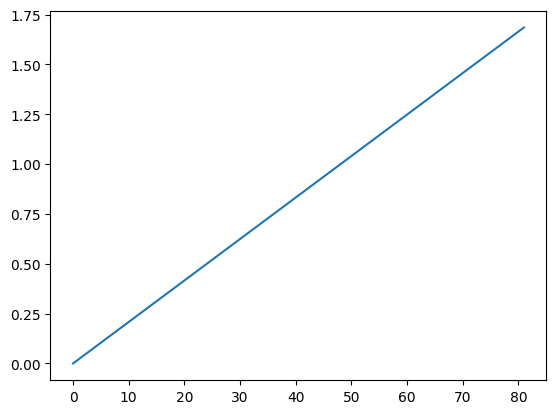

In [42]:
plt.plot(vel[:, 1])